<a href="https://colab.research.google.com/github/Yshen-11/DUKE_XAI/blob/main/Assignment_3_Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3 - Interpretable ML**

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
!pip install pygam
from pygam import LogisticGAM, s

# Load dataset
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
churn_data = pd.read_csv(file_path)

# Preprocess data
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].median(), inplace=True)
churn_data['Churn'] = churn_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


## Task 1. EDA

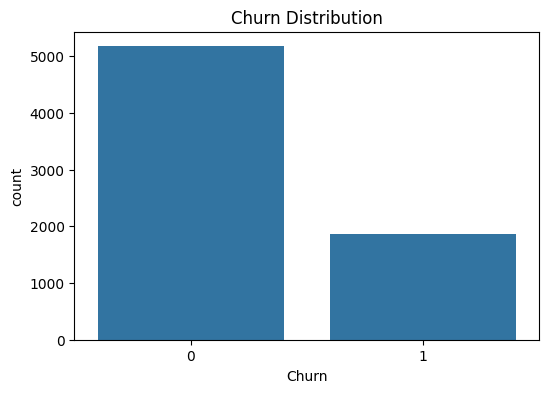

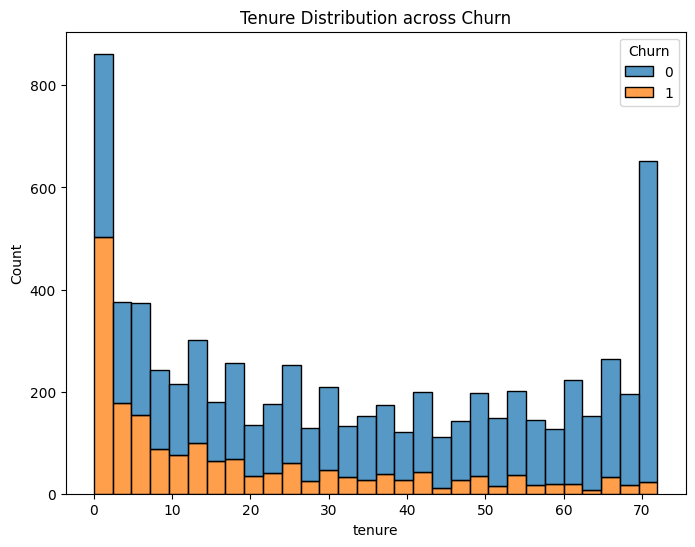

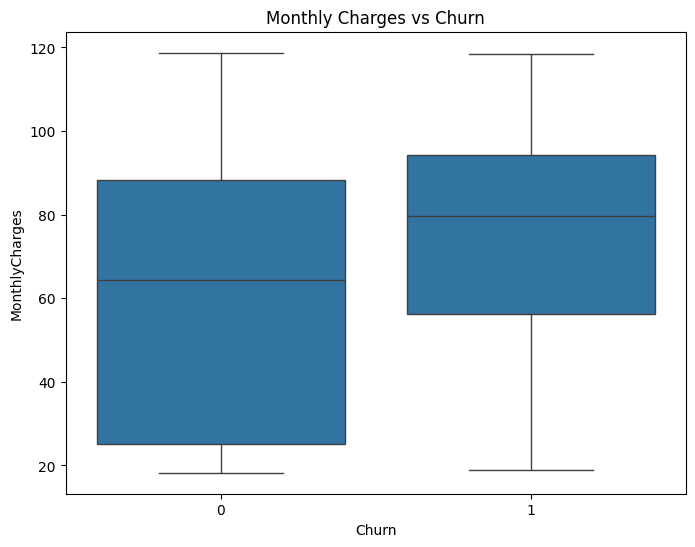

In [6]:
# EDA: Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=churn_data, x='Churn')
plt.title('Churn Distribution')
plt.show()

# EDA: Tenure Distribution across Churn
plt.figure(figsize=(8, 6))
sns.histplot(data=churn_data, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution across Churn')
plt.show()

# EDA: Monthly Charges vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=churn_data, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()



1.   Churn Distribution: A majority of customers did not churn, but a significant portion (approximately 25-30%) did.
2.   Tenure Distribution: Customers with shorter tenure tend to churn more frequently, while customers with longer tenure are less likely to churn.
3.   Monthly Charges: Customers with higher monthly charges appear to churn more often than those with lower charges, as indicated by the higher median monthly charges for churned customers.
  




## Task 2. Linear Regression

In [7]:
# Select features and target
X = churn_data[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = churn_data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.14925420361421254
R-squared: 0.245646250431381


Mean Squared Error (MSE): 0.149

R-squared (R²): 0.246 (24.6% of variance explained)

This suggests that linear regression captures some relationships but may not be ideal for this binary classification task.

## Task 3. Logistic Regression

In [8]:
# Build a logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = logistic_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7893989588263133
Confusion Matrix:
[[1408  131]
 [ 314  260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



1. **Accuracy: 78.9%**  
   The model performs well, correctly predicting churn 79% of the time. However, accuracy can be misleading due to class imbalance (more non-churners than churners).

2. **Confusion Matrix:**  
   - **True Negatives (1408):** Correctly predicted non-churners.
   - **False Positives (131):** Wrongly predicted as churners.
   - **True Positives (260):** Correctly predicted churners.
   - **False Negatives (314):** Missed predicting churners.  
   The model predicts non-churners better than churners.

3. **Precision, Recall, and F1-Score:**  
   - **Non-churners (class 0):** Precision = 0.82, Recall = 0.91, F1 = 0.86 (Strong performance).
   - **Churners (class 1):** Precision = 0.66, Recall = 0.45, F1 = 0.54 (Needs improvement, especially recall).

4. **Macro/Weighted Averages:**  
   Both averages indicate decent performance, but the low recall for churners pulls down the macro average.

## Task 4. Generalized Additive Model (GAM)

In [9]:
# Build a GAM model
gam = LogisticGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Make predictions
y_pred_gam = gam.predict(X_test)

# Evaluate the model
accuracy_gam = accuracy_score(y_test, y_pred_gam)
print(f"GAM Accuracy: {accuracy_gam}")

GAM Accuracy: 0.7941315664931378



The Generalized Additive Model (GAM) results show an accuracy of 79.4%, which is very close to the accuracy of the logistic regression model (78.9%).




## Task 5. Model Comparison

In [10]:
# Compare the performance of each model

print("Model Performance Comparison:")
print(f"Linear Regression R-squared: {r2}")
print(f"Logistic Regression Accuracy: {accuracy}")
print(f"GAM Accuracy: {accuracy_gam}")

# You can add more advanced metrics comparison here if required.

Model Performance Comparison:
Linear Regression R-squared: 0.245646250431381
Logistic Regression Accuracy: 0.7893989588263133
GAM Accuracy: 0.7941315664931378


**Model Comparison and Recommendations:**

1. **Linear Regression (R² = 0.246):**
   - Strengths: Simple, easy to interpret.
   - Weaknesses: Not suited for classification, poor fit.
   - Recommendation: 加粗文字Not suitable for churn prediction.

2. **Logistic Regression (Accuracy = 78.9%):**
   - Strengths: Interpretable, handles binary classification well.
   - Weaknesses: Low recall for churners (45%), missing many actual churns.
   - Recommendation: A solid baseline model, but could benefit from further tuning.

3. **GAM (Accuracy = 79.4%):**
   - Strengths: Captures non-linear relationships, slightly better accuracy.
   - Weaknesses: Marginal improvement over logistic regression.
   - Recommendation: Good for understanding non-linear effects; use if interpretability is a priority.

**Final Recommendation:**
- **Logistic Regression** for its balance of simplicity and performance.
- **GAM** if deeper insights into feature impacts are needed.